## Importando librerías y data 

### Librerías 

In [3]:
# Manejo de datos
import pandas as pd 
import numpy as np

# Visualización e imagenes
import matplotlib.pyplot as plt
import seaborn as sns


# Otros
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Data

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Join data (train and test)

In [5]:
# Concatenando train y test 
data = pd.concat((train, test))

print("Tamaoño data: {}".format(data.shape))
data.tail()

Tamaoño data: (1309, 12)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


## Inpección inicial de la data 

### Tipos de varibles y descripción de la data

In [6]:
data.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [115]:
data.select_dtypes('float').describe()

,Age,Fare,Survived
count,1046.000000,1308.000000,891.000000
mean,29.881138,33.295479,0.383838
std,14.413493,51.758668,0.486592
min,0.170000,0.000000,0.000000
25%,21.000000,7.895800,0.000000
50%,28.000000,14.454200,0.000000
75%,39.000000,31.275000,1.000000
max,80.000000,512.329200,1.000000


### Nulos en la data

In [79]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### Cabin

In [95]:
print('Numero de catigorías distintas',len(data['Cabin'].unique()))
data['Cabin'].value_counts().head(10)

Numero de catigorías distintas 187


C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C78                4
C22 C26            4
F2                 4
F4                 4
D                  4
B96 B98            4
F33                4
Name: Cabin, dtype: int64

### Embarked

In [87]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

### Name 

In [100]:
print('Numero de catigorías distintas',len(data['Name'].unique()))
data['Name'].value_counts().head(10)

Numero de catigorías distintas 1307


Connolly, Miss. Kate          2
Kelly, Mr. James              2
Olsen, Mr. Henry Margido      1
Carter, Mr. William Ernest    1
Saalfeld, Mr. Adolphe         1
Roth, Miss. Sarah A           1
Turja, Miss. Anna Sofia       1
Dodge, Master. Washington     1
Stahelin-Maeglin, Dr. Max     1
Hagardon, Miss. Kate          1
Name: Name, dtype: int64

### Ticket

In [106]:
print('Numero de catigorías distintas',len(data['Ticket'].unique()))
data['Ticket'].value_counts().head(5)

Numero de catigorías distintas 929


CA. 2343    11
CA 2144      8
1601         8
347082       7
3101295      7
Name: Ticket, dtype: int64

### Pclass

In [116]:
print('Numero de catigorías distintas',len(data['Pclass'].unique()))
data['Pclass'].value_counts().head(5)

Numero de catigorías distintas 3


3    709
1    323
2    277
Name: Pclass, dtype: int64

### Parch

In [118]:
print('Numero de catigorías distintas',len(data['Parch'].unique()))
data['Parch'].value_counts().head(5)

Numero de catigorías distintas 8


0    1002
1     170
2     113
3       8
5       6
Name: Parch, dtype: int64

### SibSp

In [119]:
print('Numero de catigorías distintas',len(data['SibSp'].unique()))
data['SibSp'].value_counts().head(5)

Numero de catigorías distintas 7


0    891
1    319
2     42
4     22
3     20
Name: SibSp, dtype: int64

## Exploración visual de los datos 

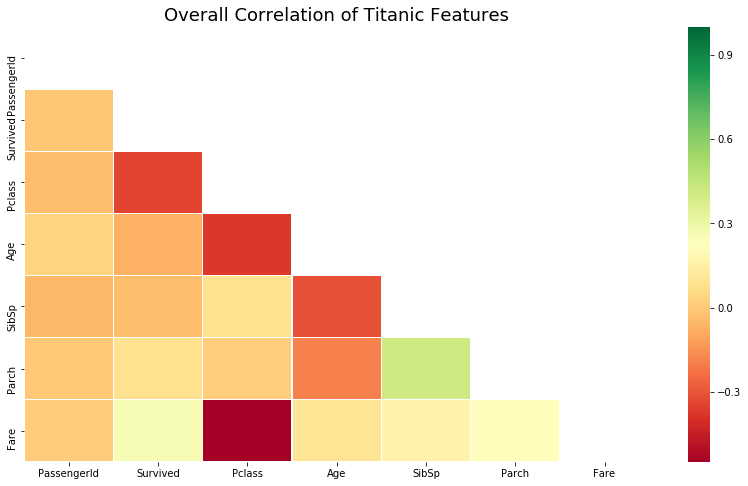

In [9]:
# inicializamos correlación
corr = train.corr()
# Configuramos Mascara
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Tamaño figura
plt.figure(figsize=(14, 8))
# Titulo
plt.title('Overall Correlation of Titanic Features', fontsize=18)
# Correlation matrix
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

### Survived

0    549
1    342
Name: Survived, dtype: int64


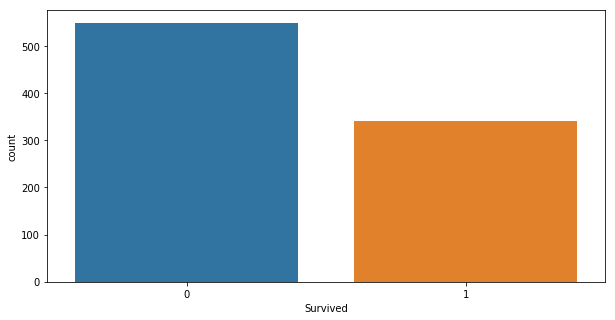

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(x='Survived', data = train)
print(train['Survived'].value_counts())

### Age

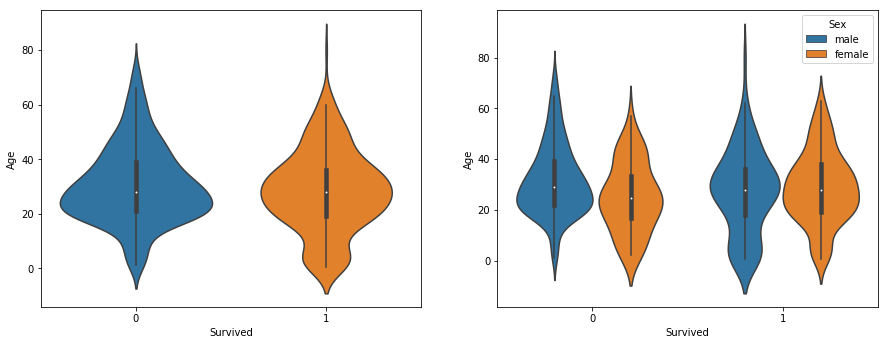

In [39]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
sns.violinplot(x='Survived', y ='Age', data=train)

plt.subplot(2,2,2)
sns.violinplot(x='Survived', y ='Age', hue= 'Sex', data=train)


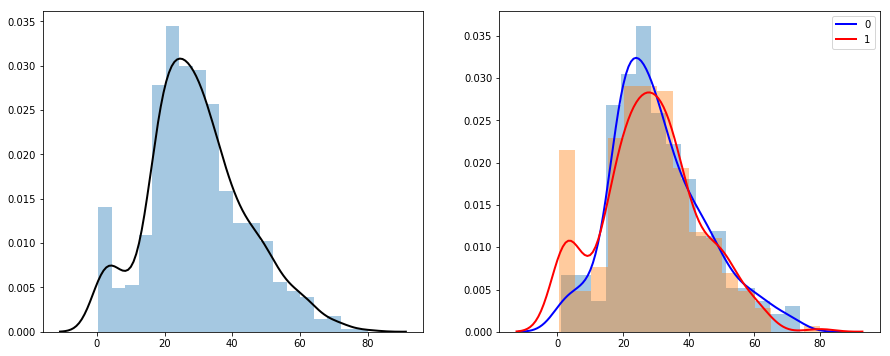

In [73]:
mask1 = [x==1 for x in train['Survived']]
mask0 = [x==0 for x in train['Survived']]

plt.figure(figsize = (15,13))
plt.subplot(2,2,1)
sns.distplot(train[['Age']].dropna(),kde_kws={"color": "k", "lw": 2})

plt.subplot(2,2,2)
sns.distplot(train[['Age']][mask0].dropna(), kde_kws={"color": "b", "lw": 2, "label": "0"})
sns.distplot(train[['Age']][mask1].dropna(), kde_kws={"color": "r", "lw": 2, "label": "1"})

### sex

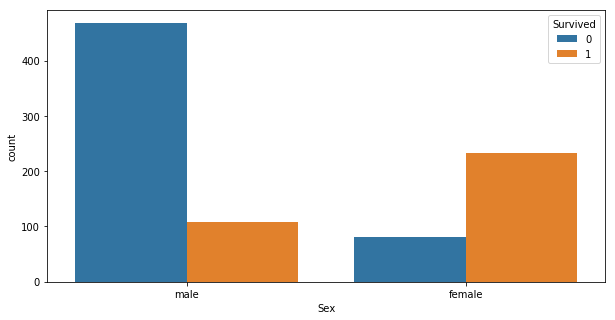

In [78]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Sex'],hue=train['Survived'])

### Embarked

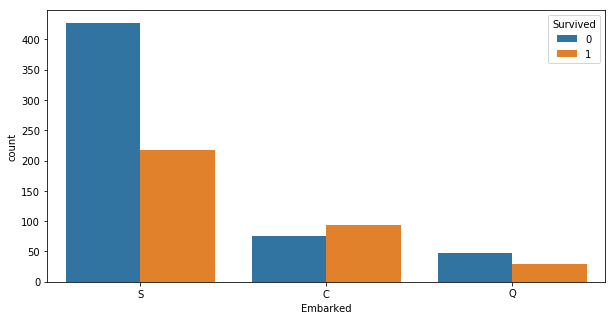

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Embarked'],hue=train['Survived'])

### Pclass

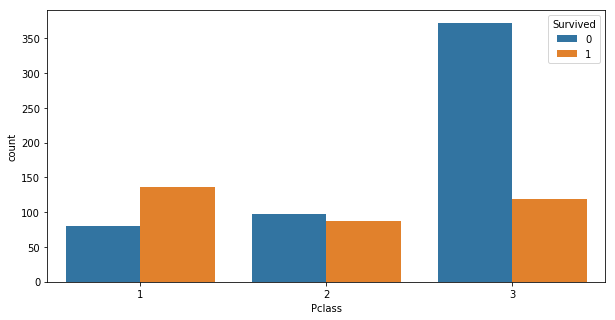

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Pclass'],hue=train['Survived'])

### Parch

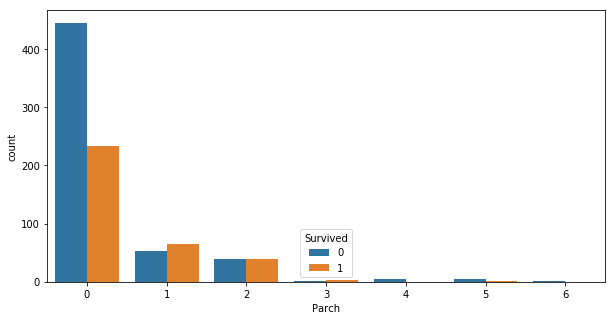

In [111]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Parch'],hue=train['Survived'])

### SibSp 

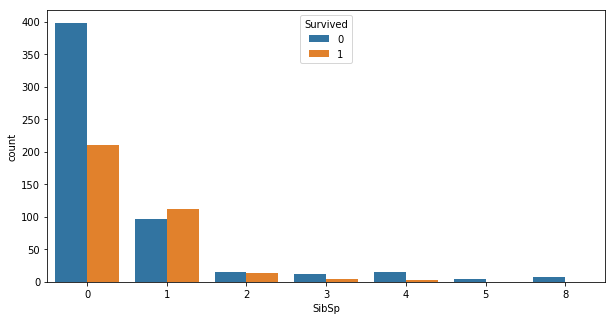

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['SibSp'],hue=train['Survived'])

## Ingeniería de Variables

### Cabin

Numero de catigorías distintas 9
no_valor    1014
C             94
B             65
D             46
E             41
A             22
F             21
G              5
T              1
Name: Cabin_encodig, dtype: int64


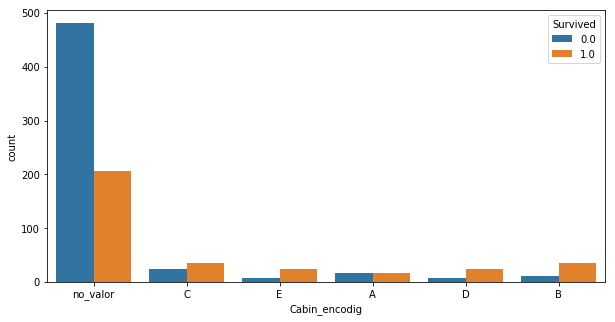

In [143]:
data['Cabin_encodig'] = data['Cabin'].str[0]
data['Cabin_encodig'].fillna('no_valor', inplace=True)

print('Numero de catigorías distintas',len(data['Cabin_encodig'].unique()))
print(data['Cabin_encodig'].value_counts().head(10))

data['Cabin_encodig'].replace(['F', 'G', 'T'],'A', inplace= True)

plt.figure(figsize=(10,5))
sns.countplot(x=data['Cabin_encodig'],hue=data['Survived'])
